In this code we do EDA and then model a Kyphosis diesaese operation success/failure dataset. Predictive Modelling is done  using decision trees and ensemble learning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset import and data check

In [7]:
kyphosisdf=pd.read_csv("kyphosis.csv")

In [8]:
kyphosisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


Kyphosis column -Present or Abesnt or operation , Age -Age in months,Number-Number  of vertebras operated,start- starting number of vertibae opereated

Exploratory data analysis

In [25]:
kyphosisdf['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

From above we can see the label is imbalanced

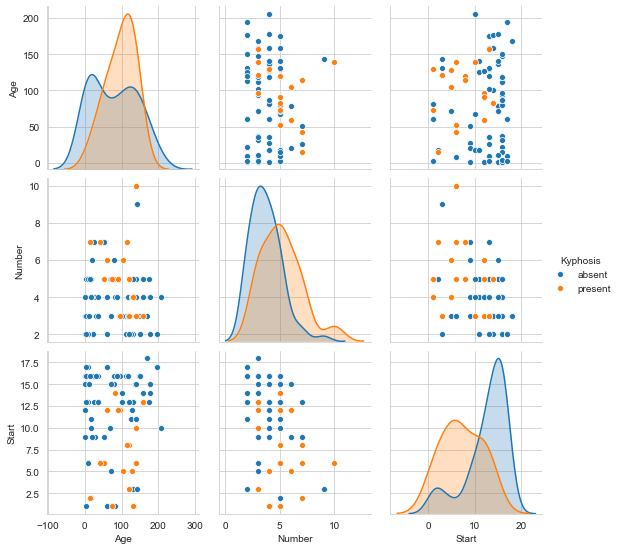

In [11]:
sns.set_style('whitegrid')
sns.pairplot(data=kyphosisdf,hue='Kyphosis')

Spliting test and train

In [12]:
from sklearn.model_selection  import train_test_split

In [17]:
ftrain,ftest,ltrain,ltest=train_test_split(kyphosisdf[['Age', 'Number', 'Start']],kyphosisdf['Kyphosis'],test_size=0.41,random_state=111)

predictive modelling using single decision tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
myDTC=DecisionTreeClassifier()
myDTC.fit(ftrain,ltrain)
predictions=myDTC.predict(ftest)

performance analyses

In [22]:
from sklearn import metrics

In [24]:
print(metrics.classification_report(ltest,predictions))
print('\n')
print(metrics.confusion_matrix(ltest,predictions))

              precision    recall  f1-score   support

      absent       0.96      0.77      0.85        30
     present       0.30      0.75      0.43         4

    accuracy                           0.76        34
   macro avg       0.63      0.76      0.64        34
weighted avg       0.88      0.76      0.80        34



[[23  7]
 [ 1  3]]


predictive modelling using ensemble learning -random forest with 141 trees

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
myRFC=RandomForestClassifier(141)
myRFC.fit(ftrain,ltrain)
predictions=myRFC.predict(ftest)

In [30]:
print(metrics.classification_report(ltest,predictions))
print('\n')
print(metrics.confusion_matrix(ltest,predictions))

              precision    recall  f1-score   support

      absent       1.00      0.83      0.91        30
     present       0.44      1.00      0.62         4

    accuracy                           0.85        34
   macro avg       0.72      0.92      0.76        34
weighted avg       0.93      0.85      0.87        34



[[25  5]
 [ 0  4]]


Hence Random forest decorelates models as well as datsets to minimize overfitting

Decison tree visualization using Graphviz and pydot

In [51]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

In [52]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

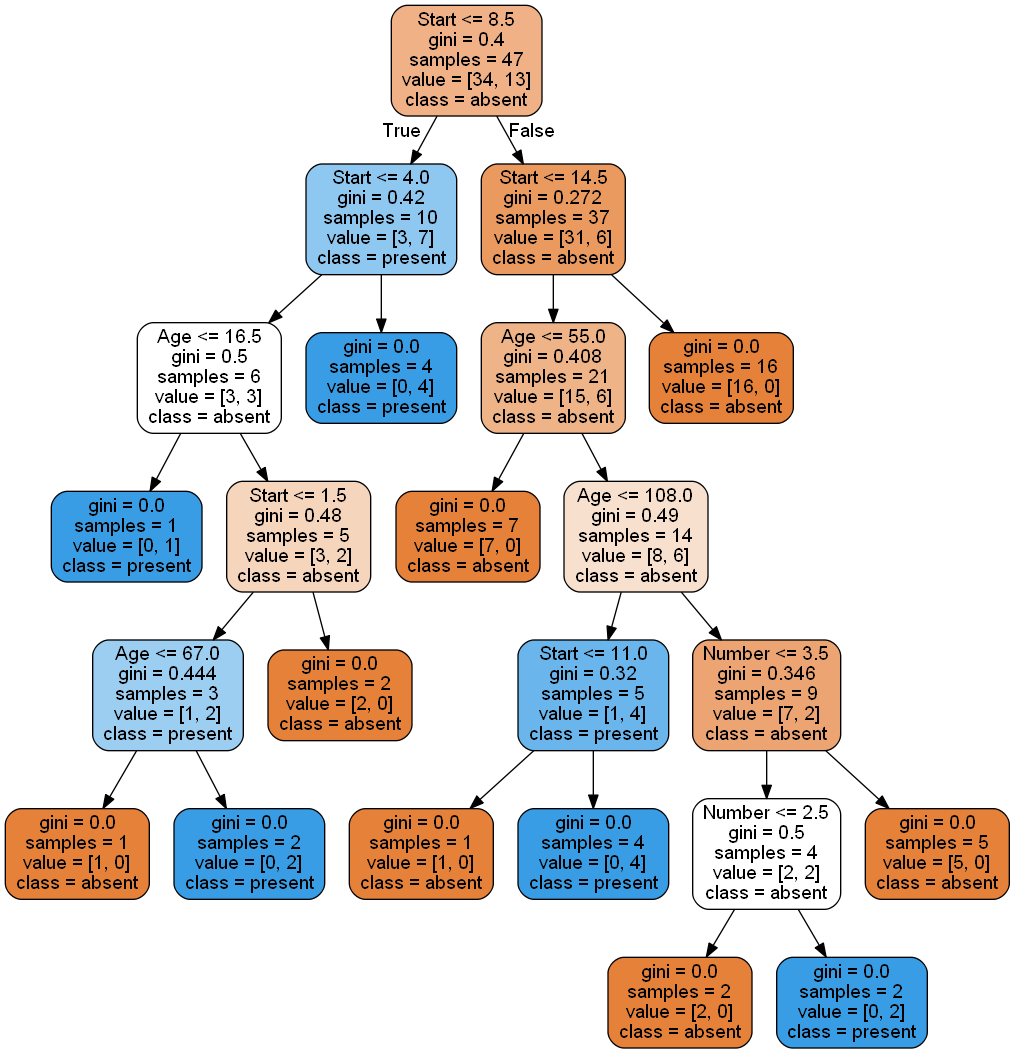

In [56]:
dot_data=StringIO()
export_graphviz(myDTC,out_file=dot_data,feature_names=ftest.columns,class_names=['absent','present'],filled=True,rounded=True)
graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())